# YouTube trending videos

In [37]:
% matplotlib inline


import numpy as np
from numpy import nan

# import json
# import math
import os
from typing import List
# import re
# from IPython.display import Image

import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
import pandas as pd
# from tqdm.notebook import tqdm
from scipy import stats

from helpers.categories import get_categories_dict

## Etap 3 - Ocena ważności atrybutów


### Wczytanie danych zgrupowanych po id

In [1]:
numeric_attrs = [
    "views", "likes", "dislikes", "comment_count", "description_len", "title_len", "channel_title_len",
    "publish_time_day_of_week", "publish_time_hour_of_day"
]


def plot_categories(title: str, categories_dict: dict, data: pd.DataFrame) -> list:
    nan_count = data["new_category_id"].isna().sum()
    plt.title(title)
    attr_c = data["new_category_id"].value_counts()
    attr_c = attr_c.rename_axis("new_category_id").reset_index(name="count")
    labels = [categories_dict[i] for i in attr_c["new_category_id"]]
    plt.bar(labels, attr_c["count"])
    plt.xticks(rotation=270, fontsize=15)
    plt.show()

    print(f"{title} Liczba wartości 'nan':{nan_count}")
    return attr_c["new_category_id"].tolist()


data_path = os.path.join("..", "categories_data")
gb_videos = pd.read_csv(os.path.join(data_path, "GB_videos_5p.csv"), sep=";", index_col=0)
us_videos = pd.read_csv(os.path.join(data_path, "US_videos_5p.csv"), sep=";", index_col=0)
videos = pd.concat([gb_videos, us_videos])
for name in numeric_attrs:
    videos[name] = videos[name].apply(lambda x: eval(x))
videos.head(10)

categories_dict = get_categories_dict()

d = [gb_videos, us_videos]
names = ["Kategorie GB", "Kategorie US"]
for df, name in zip(d, names):
    plot_categories(name, categories_dict, df)
categories = plot_categories("Kategorie", categories_dict, videos)


NameError: name 'pd' is not defined

TODO komentarz nizbalansowane dane

In [39]:
for i in numeric_attrs:
    videos[i] = videos[i].apply(lambda x: x[-1])
videos["category_name"] = videos["new_category_id"].apply(lambda x: np.nan if np.isnan(x) else categories_dict[x])
grouped = videos.groupby("category_name")

grouped.agg([np.mean, np.std])
# videos.describe()

views                        likes  \
                               mean           std           mean   
category_name                                                      
Autos & Vehicles       1.141300e+06  2.401132e+06   14996.890411   
Comedy                 1.528191e+06  1.946888e+06   57165.259677   
Education              6.373416e+05  9.994431e+05   22717.864286   
Entertainment          2.055705e+06  7.065023e+06   53639.029817   
Film & Animation       2.478536e+06  5.384405e+06   46144.854701   
Gaming                 1.234628e+06  1.995944e+06   37404.959350   
Howto & Style          8.221302e+05  2.359169e+06   31379.553425   
Music                  9.680061e+06  2.703447e+07  229322.544610   
News & Politics        5.241834e+05  1.188799e+06    7952.808950   
Nonprofits & Activism  3.416222e+06  8.171904e+06  251556.111111   
People & Blogs         1.392806e+06  3.906512e+06   42707.675758   
Pets & Animals         8.036315e+05  1.204420e+06   20266.835227   
Science & Technology   1.148030e+06  2.930253e+06   27750.821687   
Sports                 1.337699e+06  3.267596e+06   26167.779967   
Travel & Events        1.019269e+06  3.051579e+06    9727.553846   

                                          dislikes                 \
                                 std          mean            std   
category_name                                                       
Autos & Vehicles        21548.247860    601.178082     898.610831   
Comedy                  87954.417948   2075.358065    3572.794663   
Education               41030.451375    788.003571    1446.116588   
Entertainment          178491.389830   5850.412385   76044.106529   
Film & Animation        90413.360281   2098.918803    4086.382387   
Gaming                  60224.903519   2160.252033    5408.373975   
Howto & Style           53324.737701   1043.005479    3167.510075   
Music                  490080.850637   8857.712515   26697.570019   
News & Politics         31179.470663   1686.547332    6658.686309   
Nonprofits & Activism  650955.912384  61707.666667  168213.768881   
People & Blogs          81371.195963   3017.109091   15440.568927   
Pets & Animals          28630.179673    523.715909     806.903116   
Science & Technology    52621.666488   1322.838554    3541.677086   
Sports                 106508.250673   1885.060755   11533.492319   
Travel & Events         10243.780255    641.292308    1326.847953   

                      comment_count                description_len  \
                               mean            std            mean   
category_name                                                        
Autos & Vehicles        2218.794521    2926.711043      741.169014   
Comedy                  6141.419355   13491.649815     1004.555375   
Education               2540.214286    3986.719002     1472.584838   
Entertainment           8189.290826   56376.349043      996.297159   
Film & Animation        5522.435897   10537.877198      963.841542   
Gaming                  6805.203252   12383.775557      826.872428   
Howto & Style           4386.321918   14498.445658     1432.156809   
Music                  18199.416357   60989.227930      801.066085   
News & Politics         2859.013769    7775.702027      793.562057   
Nonprofits & Activism  80752.833333  219435.731349     1137.571429   
People & Blogs          5675.654545   21235.128074      934.298742   
Pets & Animals          2495.409091    4558.738105     1050.465517   
Science & Technology    4007.696386   11231.619775     1026.693627   
Sports                  3216.254516    9289.058209      801.407654   
Travel & Events         1690.046154    2422.531910     1072.846154   

                                    title_len            channel_title_len  \
                               std       mean        std              mean   
category_name                                                                
Autos & Vehicles        674.399076  49.726027  16.192643         12

# Atrybuty numeryczne

Korelacja atrybutów liczbowych z kategorią

Korelacja ETA i ANOVA (Analysis of Variance) i F test z p

[24.0, 10.0, 26.0, 22.0, 23.0, 17.0, 25.0, 1.0, 28.0, 27.0, 20.0, 15.0, 2.0, 19.0, 29.0]
15
views: f_score = 42.52843019359817 p_value = 5.725638831421379e-114


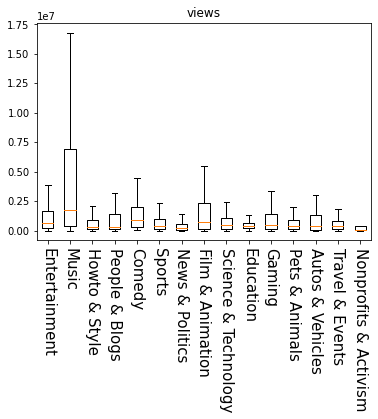

likes: f_score = 63.4383395367562 p_value = 1.3417823975562106e-171


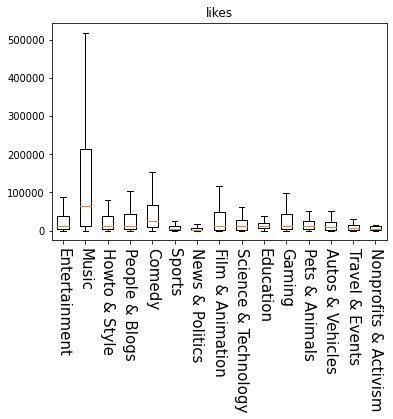

dislikes: f_score = 5.6727080936775875 p_value = 4.131639242032016e-11


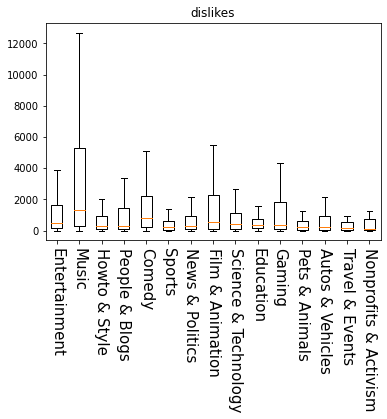

comment_count: f_score = 14.40104240851909 p_value = 7.094228782184063e-35


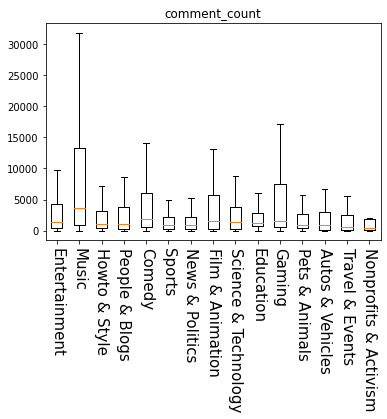

description_len: f_score = 35.28077776411028 p_value = 1.1965109301151156e-93


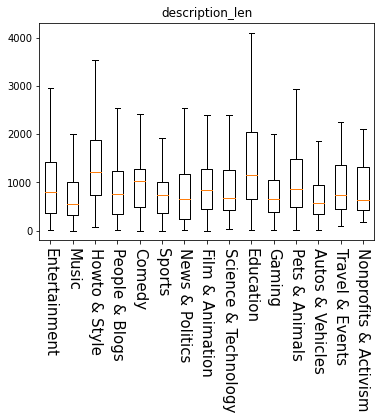

title_len: f_score = 69.97833842678143 p_value = 2.508022805516716e-189


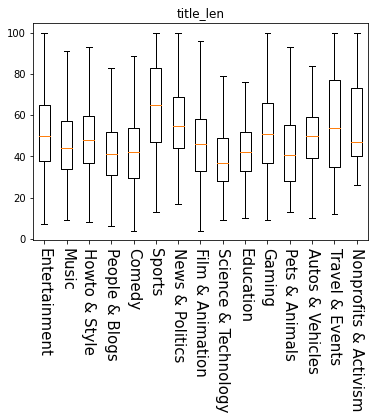

channel_title_len: f_score = 54.26644533116559 p_value = 1.7106414156763909e-146


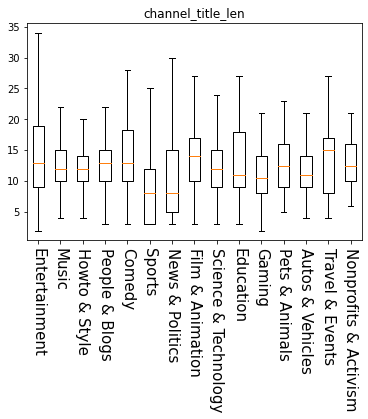

publish_time_day_of_week: f_score = 4.4781752308734175 p_value = 4.232630869892645e-08


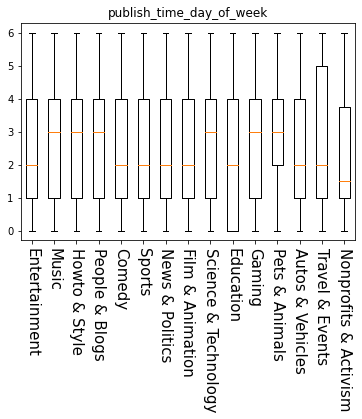

publish_time_hour_of_day: f_score = 19.390014949374397 p_value = 6.799815815987679e-49


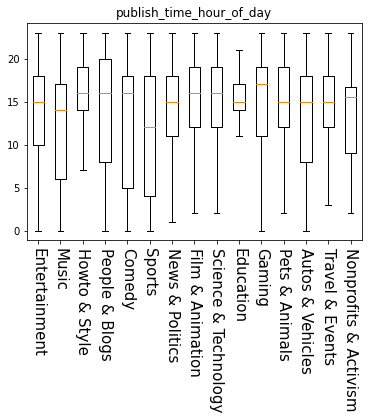

0.46918479532312785


,attr,f score,p value,leq alpha
0,views,42.528430,5.725639e-114,True
1,likes,63.438340,1.341782e-171,True
2,dislikes,5.672708,4.131639e-11,True
3,comment_count,14.401042,7.094229e-35,True
4,description_len,35.280778,1.196511e-93,True
5,title_len,69.978338,2.508023e-189,True
6,channel_title_len,54.266445,1.710641e-146,True
7,publish_time_day_of_week,4.478175,4.232631e-08,True
8,publish_time_hour_of_day,19.390015,6.799816e-49,True


In [52]:
# stats.chi2.pdf()
print(categories)
categories_data = []
N = 0
a = len(categories)
for category_id in categories:
    c_data = videos[videos["new_category_id"] == category_id]
    N += len(c_data)
    categories_data.append(c_data)
print(len(categories_data))

dfn = a - 1
dfd = N - a


def anova(data: List[pd.DataFrame], attr: str):
    data_set = list(map(lambda x: x[attr].dropna(), data))
    f_score, p_value = stats.f_oneway(
        *data_set
    )
    print(f"{attr}: f_score = {f_score} p_value = {p_value}")
    plt.title(attr)
    plt.boxplot(data_set, showfliers=False)
    labels = [categories_dict[i] for i in categories]
    plt.xticks(np.arange(1, len(labels) + 1), labels, rotation=270, fontsize=15)
    plt.show()
    return f_score, p_value


f_scores = pd.DataFrame()
alpha = 0.05
for i in numeric_attrs:
    f, p = anova(categories_data, i)
    f_scores = f_scores.append(pd.DataFrame(
        data={"attr": [i], "f score": [f], "p value": [p], "leq alpha": [p <= alpha]}
    ), ignore_index=True)
print(stats.f.ppf(0.05, dfn, dfd))
f_scores

Poszczególne kategorie mają różne średnie wartości na wszystkich atrybutach ( $$ \alpha = 0.05 $$ )

Zapisanie ostatecznego zbioru danych.

In [ ]:
# TODO